In [1]:
from numpy import *
from scipy import *
from scipy.linalg import *
from scipy.interpolate import *
import matplotlib.pyplot as plt
from scipy.optimize import *
import random

# Linear equations 

Lets solve 3 * x$_0$ + x$_1$ = 9 and x$_0$ + 2 * x$_1$ = 8


In [2]:
a = array([[3,1], [1,2]])  # These are the left side terms in the first and second eqs respectively
b = array([9,8])           # These are the right side terms
x = linalg.solve(a, b)     # use "solve" function from linalg (linear algebra)
print (x)

[2. 3.]


In [3]:
a = array([[1, 2, 0], [0, 0, 3], [4, 0, 5]])  # These are the left side terms in the first and second eqs respectively
b = array([1,1,1])           # These are the right side terms
x = linalg.solve(a, b)     # use "solve" function from linalg (linear algebra)
print (x)

[-0.16666667  0.58333333  0.33333333]


# Polynomials

## Evaluating a polynomial function
Polynomials can be represented as a list of coefficients. For example, the polynomial 4x$^3$ + 3x$^2$ −2x + 10 = 0 can be represented as [4, 3, -2, 10]. Here are some ways to create a polynomial object, and evaluate it.


In [4]:
from numpy import *

polycoeff = [4, 3, -2, 10]  # Input the polynomial coefficients, highest order first
PolyFunc = poly1d(polycoeff) # use poly1d to tell python to create the polynomial function with the given name 


PolyFuncDer = polyder(PolyFunc)  # You can even calculate the derivative 
PolyFuncInt = polyint(PolyFunc)   # or the integral !

print (PolyFunc)
print ('----------------------')
print (PolyFuncDer)
print ('----------------------')
print (PolyFuncInt)
print ('----------------------')
print (PolyFunc(3), PolyFunc(-10) )

   3     2
4 x + 3 x - 2 x + 10
----------------------
    2
12 x + 6 x - 2
----------------------
   4     3     2
1 x + 1 x - 1 x + 10 x
----------------------
139 -3670


## Finding roots of the polynomial

In [5]:
print (roots([2, 0, -1]))  # "roots" is a very powerfull function that find the roots of polynomials
print (roots([1, 0, 1]))  # It even works for polynomials with complex number solutions !

[-0.70710678  0.70710678]
[-0.+1.j  0.-1.j]


## Example: The Van Der Waal equation 
$f(V) = V^3 - \frac{p n b + n R T}{p} V^2 + \frac{n^2 a}{p}V - \frac{n^3 a b}{p} = 0$
where a and b are constants, p is the pressure, R is the gas constant, T is an absolute temperature and n is the number of moles. The roots of this equation tell you the volume of the gas at those conditions.

In [6]:
a = 3.49e4
b = 1.45
p = 679.7   # pressure in psi
T = 683     # T in Rankine
n = 1.136   # lb-moles
R = 10.73       # ft^3 * psi /R / lb-mol

ppar = [1.0, -(p*n*b+n*R*T)/p, n**2*a/p,  -n**3*a*b/p]
print (roots(ppar))

[5.09432376+0.j         4.4006681 +1.43502848j 4.4006681 -1.43502848j]


# Interpolations

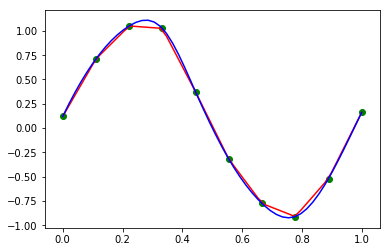

In [7]:
from numpy import random

# Line below means create a linear array with 10 elements that starts with 0 and ends at 1
measured_time = linspace(0, 1, 10)
noise = (random.random(10)) * 2e-1   # Create random noise
measures = sin(2 * pi * measured_time) + noise  # Create measured signal: sin wave + noise
plt.scatter(measured_time,measures, c='g' )  # plot measured signal 


linear_interp = interp1d(measured_time, measures)   # create a 1d interpolator fitting x and y
interpolation_time = linspace(0, 1, 50)             # create a new array of x' values
linear_results = linear_interp(interpolation_time)  # calculate y for x' using the interpolated function 
plt.plot(interpolation_time, linear_results, c='r') # Plot


cubic_interp = interp1d(measured_time, measures, kind='cubic')  # same as above, but cubic interpolation
# kind can also be ‘linear’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’ ....
cubic_results = cubic_interp(interpolation_time)
plt.plot(interpolation_time, cubic_results, c='b')

plt.show()

# Curves fitting

## We will use curve_fit (non-linear least squares method that fits a function, f, to data)

curve_fit(f, xdata, ydata, p0, sigma)

xdata : An M-length sequence or an (k,M)-shaped array for functions with k predictors
The independent variable where the data is measured.

ydata : M-length sequence
The dependent data — nominally f(xdata, …)

p0 : None, scalar, or N-length sequence, optional
Initial guess for the parameters. If None, then the initial values will all be 1 (if the number of parameters for the function can be determined using introspection, otherwise a ValueError is raised).

sigma : None or M-length sequence or MxM array, optional, Determines the uncertainty in ydata


/home/mad/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


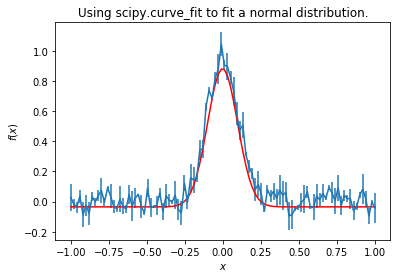

In [8]:
# Create a function which returns a Gaussian (normal) distribution.
def gauss(x, *p):
    a, b, c, d = p
    y = a*exp(-((x - b)**2.)/(2. * c**2.)) + d
    return y + 0.1*(random.random()*2. - 1.)

# Choose some initial guesses for our params (a, b, c, d above) for our distribution 
initial_guess = [1.0, 0.0, 0.1, 0.0]

N = 100 # Number of data points.

# Create our data sets. 
x = linspace(-1, 1, N)
y = array([gauss(i, *initial_guess) for i in x])

# generate completely random data for the errors.
e = array([random.random()*0.1 for _ in y])

# Use curve_fit to fit the gauss function to our data. Use the
# unperturbed p_initial as our initial guess.
popt, pcov = curve_fit(gauss, x, y, p0=initial_guess, sigma=e)

# Generate y-data based on the fit.
y_fit = gauss(x, *popt)

# Create a plot of our work, showing both the data and the fit.

plt.errorbar(x,y,e)
plt.plot(x, y_fit, color = 'red')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title('Using scipy.curve_fit to fit a normal distribution.')

plt.show()

# Fourier transforms

--2018-11-24 13:06:17--  https://www.scipy-lectures.org/_downloads/populations.txt
Resolving www.scipy-lectures.org (www.scipy-lectures.org)... 185.199.109.153, 185.199.110.153, 185.199.111.153, ...
Connecting to www.scipy-lectures.org (www.scipy-lectures.org)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 525 [text/plain]
Saving to: ‘populations.txt.3’

populations.txt.3   100%[===================>]     525  --.-KB/s    in 0s      

2018-11-24 13:06:17 (29.1 MB/s) - ‘populations.txt.3’ saved [525/525]



/home/mad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


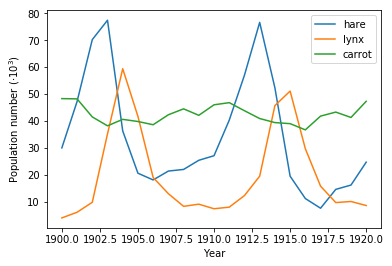

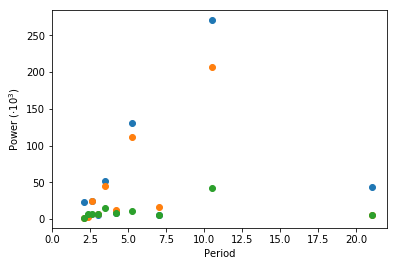

In [9]:
!wget "https://www.scipy-lectures.org/_downloads/populations.txt"
data = loadtxt('./populations.txt')
years = data[:, 0]
populations = data[:, 1:]

# Below computes the 1d n-point discrete Fourier Transform (DFT) with the efficient Fast Fourier Transform (FFT).
ft_populations = fft.fft(populations, axis=0) 

# Below Return the Discrete Fourier Transform sample frequencies.
frequencies = fft.fftfreq(populations.shape[0], years[1] - years[0])
periods = 1 / frequencies

plt.figure()
plt.plot(years, populations * 1e-3)
plt.xlabel('Year')
plt.ylabel('Population number ($\cdot10^3$)')
plt.legend(['hare', 'lynx', 'carrot'], loc=1)

plt.figure()
plt.plot(periods, abs(ft_populations) * 1e-3, 'o')
plt.xlim(0, 22)
plt.xlabel('Period')
plt.ylabel('Power ($\cdot10^3$)')

plt.show()

# There's probably a period of around 10 years (obvious from the
# plot), but for this crude a method, there's not enough data to say
# much more.

# Root finding for non linear equations 

In [10]:
from scipy.special import *
def func(x):
    # j1 is Bessel function of the first kind of order 1.
    # y0 is Bessel function of the second kind of order 0.
    return x*3 + 2 * cos(x) - tan(x**2) + j1(x) + (y0(x))**4.

sol = root(func, 0.3, method='hybr', jac=None)
print (sol.x)

[0.3]


# Ordinary differential equations

## WHEN ZOMBIES ATTACK!: MATHEMATICAL MODELLING OF AN OUTBREAK OF ZOMBIE INFECTION  (by Munz+2009)

Zombies are a popular figure in pop culture/entertainment and they are usually
portrayed as being brought about through an outbreak or epidemic. Consequently,
we model a zombie attack, using biological assumptions based on popular zombie
movies. We introduce a basic model for zombie infection, determine equilibria and
their stability, and illustrate the outcome with numerical solutions. We then refine the
model to introduce a latent period of zombification, whereby humans are infected, but
not infectious, before becoming undead. We then modify the model to include the
effects of possible quarantine or a cure. Finally, we examine the impact of regular,
impulsive reductions in the number of zombies and derive conditions under which
eradication can occur. We show that only quick, aggressive attacks can stave off the
doomsday scenario: the collapse of society as zombies overtake us all.



The system is given as:

dS/dt = P - B*S*Z - d*S
dZ/dt = B*S*Z + G*R - A*S*Z
dR/dt = d*S + A*S*Z - G*R

with the following notations:

S: the number of susceptible victims
Z: the number of zombies
R: the number of people "killed"
P: the population birth rate
d: the chance of a natural death
B: the chance the "zombie disease" is transmitted (an alive person becomes a zombie)
G: the chance a dead person is resurrected into a zombie
A: the chance a zombie is totally destroyed
This involves solving a system of first order ODEs given by: dy/dt = f(y, t)

Where y = [S, Z, R].

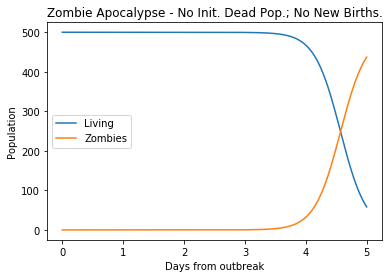

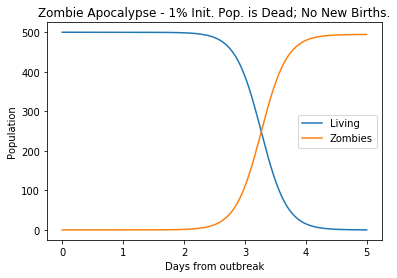

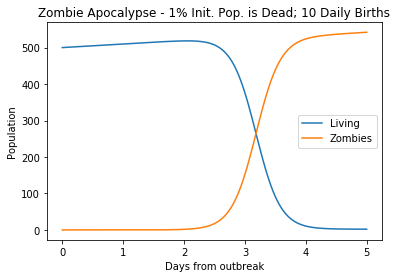

In [12]:
# zombie apocalypse modeling
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.ion()

P = 0       # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A = 0.0001  # destroy percent  (per day)

# solve the system dy/dt = f(y, t)
def f(y, t):
        Si = y[0]
        Zi = y[1]
        Ri = y[2]
        # the model equations (see Munz et al. 2009)
        f0 = P - B*Si*Zi - d*Si
        f1 = B*Si*Zi + G*Ri - A*Si*Zi
        f2 = d*Si + A*Si*Zi - G*Ri
        return [f0, f1, f2]

# initial conditions
S0 = 500.               # initial population
Z0 = 0                  # initial zombie population
R0 = 0                  # initial death population
y0 = [S0, Z0, R0]       # initial condition vector
t  = np.linspace(0, 5., 1000)   # time grid

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)

# change the initial conditions
R0 = 0.01*S0   # 1% of initial pop is dead
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; No New Births.')
plt.legend(loc=0)

# change the initial conditions
R0 = 0.01*S0   # 1% of initial pop is dead
P  = 10        # 10 new births daily
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; 10 Daily Births')
plt.legend(loc=0)